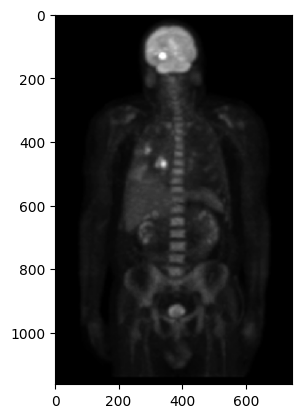

In [85]:
#a
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

	
# Read the image 
img = cv2.imread(r"C:\Users\user\Desktop\master\DIP\PET-scan.tif") 

# converting to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the images
plt.imshow(gray, cmap = 'gray') 
plt.show()

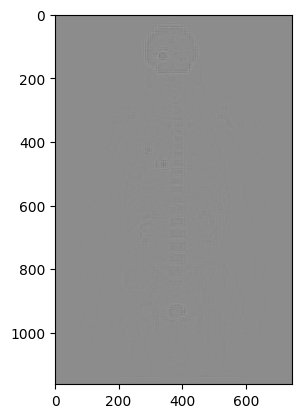

In [86]:
#b
#laplacian of main image 
laplacian = cv2.Laplacian(gray,cv2.CV_64F)

# Display the images
plt.imshow(laplacian, cmap = 'gray') 
plt.show()

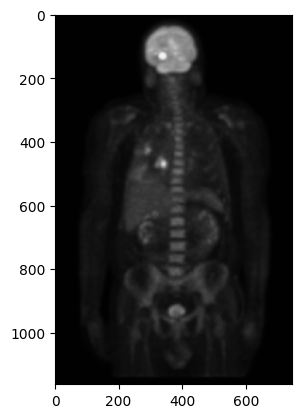

In [87]:
#c
#image sharpening by adding original image and laplacian image 
sharpened_img = gray + laplacian 

# Display the images
plt.imshow(sharpened_img, cmap = 'gray') 
plt.show()

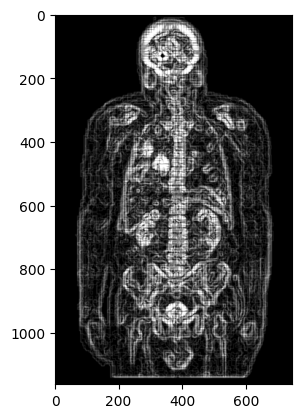

In [88]:
#d
#sobel gradient of original image 

sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)  # y

absx = cv2.convertScaleAbs(sobelx)
absy = cv2.convertScaleAbs(sobely)

sobel_img = cv2.addWeighted(absx,0.5,absy,0.5,0)
#sobel_img = sobelx + sobely 

# Display the images
plt.imshow(sobel_img, cmap = 'gray') 
plt.show()

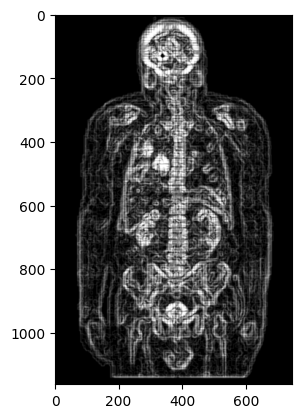

In [91]:
#e
#sobel image smoothed with a 5X5 averaging filter 


# Obtain number of rows and columns 
# of the image 
m, n = sobel_img.shape 

# Develop Averaging filter(5, 5) mask 
mask = np.ones([5, 5], dtype = int) 
mask = mask / 25

# Convolve the 5X5 mask over the image 
smoothed_sobel = np.zeros([m, n]) 

for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = sobel_img[i-1, j-1]*mask[0, 0]+sobel_img[i-1, j]*mask[0, 1]+sobel_img[i-1, j + 1]*mask[0, 2]+sobel_img[i, j-1]*mask[1, 0]+ sobel_img[i, j]*mask[1, 1]+sobel_img[i, j + 1]*mask[1, 2]+sobel_img[i + 1, j-1]*mask[2, 0]+sobel_img[i + 1, j]*mask[2, 1]+sobel_img[i + 1, j + 1]*mask[2, 2] 
        
        smoothed_sobel[i, j]= temp 
        
smoothed_sobel = smoothed_sobel.astype(np.uint8) 


# Display the images
plt.imshow(smoothed_sobel, cmap = 'gray') 
plt.show()

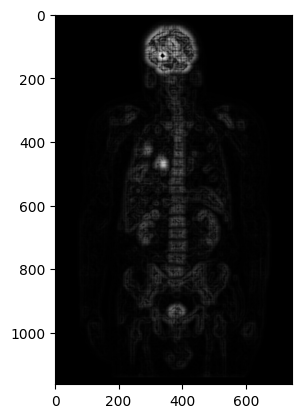

In [39]:
#f
#multiplying sharpened laplacian and smoothed sobel gradient 

mask = sharpened_img * smoothed_sobel

# Display the images
plt.imshow(mask, cmap = 'gray') 
plt.show()

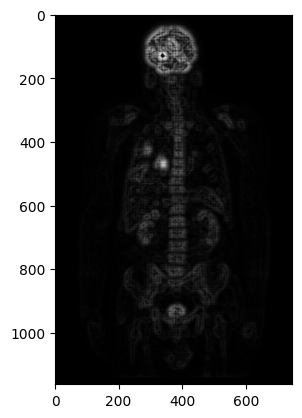

In [40]:
#g
# more sharpened image by summing original image and mask 

sharpened_img2 = gray + mask 

# Display the images
plt.imshow(sharpened_img2, cmap = 'gray') 
plt.show()

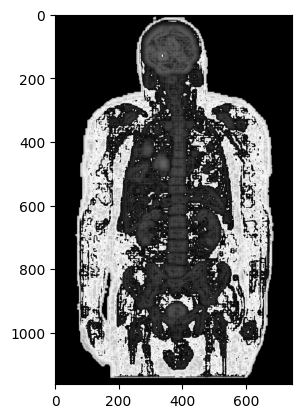

In [81]:
#h
#applying power law for enhancement 
gamma = 0.078

# Apply gamma correction. 
gamma_corrected = np.array(255*(sharpened_img2 / 255) ** gamma, dtype = 'uint8') 

np.seterr(invalid='ignore')

plt.imshow(gamma_corrected, cmap='gray') 
plt.show() 